## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# AllLife Bank Personal Loan Campaign

## Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective
* To predict whether a liability customer will buy personal loans.
* Which variables are most significant.
* Which segment of customers should be targeted more.

### Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* Securities_Account: Does the customer have securities account with the bank? (0: No, 1: Yes)
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* Online: Do customers use internet banking facilities? (0: No, 1: Yes)
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Loading libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# For pandas profiling
from pandas_profiling import ProfileReport

<IPython.core.display.Javascript object>

### Note: The first section of the notebook is the section that has been covered multiple times in the previous case studies.  For this discussion this part can be skipped and we can directly refer to this **<a href = #link1>summary</a>** of observations from EDA.

## Import Dataset

In [2]:
Loan = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another variable to avoid any changes to original data
data = Loan.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [5]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [6]:
data.shape

(5000, 14)

<IPython.core.display.Javascript object>

* The dataset has 5000 rows and 14 columns 

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

* There are no null values in the data.

In [8]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
]
data[cat_cols] = data[cat_cols].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(7)
memory usage: 342.5 KB


<IPython.core.display.Javascript object>

### Summary of the dataset.

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0


<IPython.core.display.Javascript object>

* `ID`: The ID attribute does not add any information to our analysis as all the values are unique. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.
* `Age`: Average age of customers is 45 years, age of customers has a wide range from 23 to 67 years. 
* `Experience`: A negative experience of -3 seems to be a data entry error. The average working experience of the customers is ~20 years, we have some highly experienced working professions in the data.
* `Income`: Average income of customers is 73k dollars. Income has a wide range from 8k dollars to 224k dollars, there's also a very huge difference in 75th percentile and maximum value which indicates there might be outliers present in the data. 
* `ZIPCode`: ZIPCode seems to have many unique values, we will see if some insights can be extracted from it.
* `Family`:  75% of the customers have 3 or less than 3 dependents.
* `CCAvg`: Some customers have average spending of 0 dollars a month. There's a huge difference in the 75th percentile and maximum value of the average spendings indicating that there might be outliers present.
* `Mortgage`: Average mortgage value of house of customers is ~56k dollars. Many customers do not have any mortgages.

In [10]:
data = data.drop(["ID"], axis=1)

<IPython.core.display.Javascript object>

In [11]:
data.describe(include=["category"]).T

,count,unique,top,freq
Education,5000,3,1,2096
Personal_Loan,5000,2,0,4520
Securities_Account,5000,2,0,4478
CD_Account,5000,2,0,4698
Online,5000,2,1,2984
CreditCard,5000,2,0,3530


<IPython.core.display.Javascript object>

In [12]:
for i in cat_cols:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Education are :
1    2096
3    1501
2    1403
Name: Education, dtype: int64
**************************************************
Unique values in Personal_Loan are :
0    4520
1     480
Name: Personal_Loan, dtype: int64
**************************************************
Unique values in Securities_Account are :
0    4478
1     522
Name: Securities_Account, dtype: int64
**************************************************
Unique values in CD_Account are :
0    4698
1     302
Name: CD_Account, dtype: int64
**************************************************
Unique values in Online are :
1    2984
0    2016
Name: Online, dtype: int64
**************************************************
Unique values in CreditCard are :
0    3530
1    1470
Name: CreditCard, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

* Education: Most of the customers are Graduates.
* Personal_Loan: Most of the customers didn't accept the loan in the previous campaign.
* Securities_Account: Most of the customers do not have a Securities Account.
* CD_Account: Most of the customers do not have a CD Account.
* Online: Most customers do not use internet banking facilities.
* CreditCard: Most customers do not use credit cards from any other bank.

## EDA

## Univariate analysis

In [13]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observations on Age

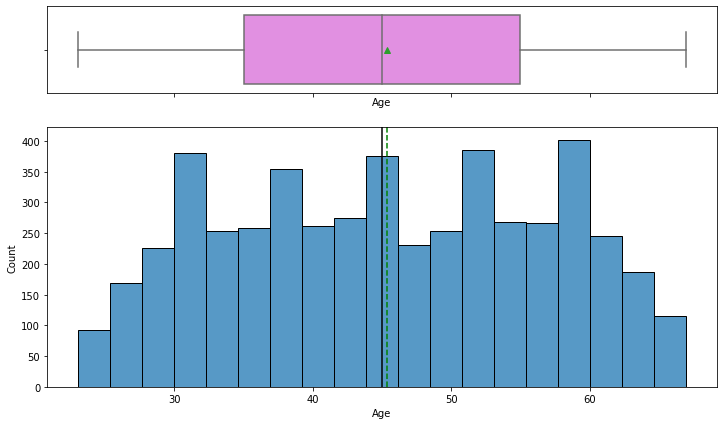

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(data, "Age")

* The distribution of Age is fairly symmetrical about the mean and the median. 
* The mean and median age of customers is almost equal to ~45 years.

### Observations on Experience

* Treating the negative values of Experience: We assume that these negative signs here are data input errors, so we will replace them with positive signs

In [15]:
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3], dtype=int64)

<IPython.core.display.Javascript object>

In [16]:
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

<IPython.core.display.Javascript object>

In [17]:
data["Experience"].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

<IPython.core.display.Javascript object>

* Minimum value of experience in 0 now.

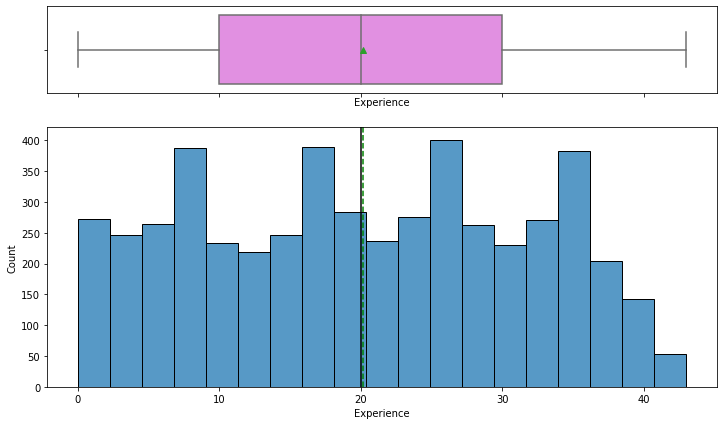

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(data, "Experience")

* The Experience variable seems to be fairly symmetrical about mean and median.
* The distribution of Experience looks like the distribution of Age, it would be interesting to see if there's a correlation between them.
* The mean and median experience of customers is equal to ~20 years.
* Some customers have experience of more than 40 years.


### Observations on Income

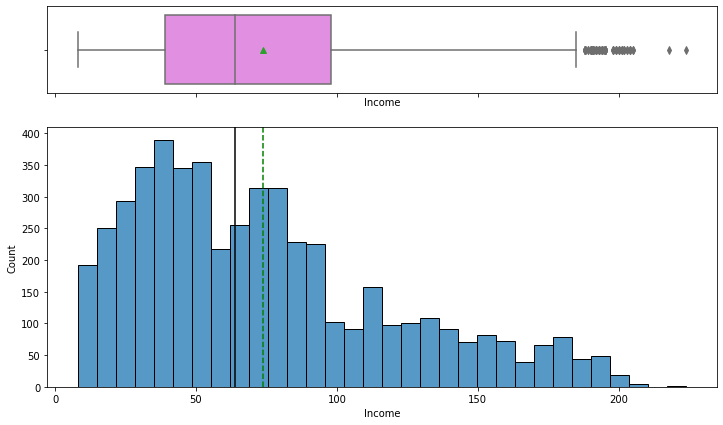

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(data, "Income")

* The distribution of Income is skewed to right.
* Some customers have an Income above 200k dollars.
* 50% of the customers have income less than 64k dollars.

### Observations on CCAvg

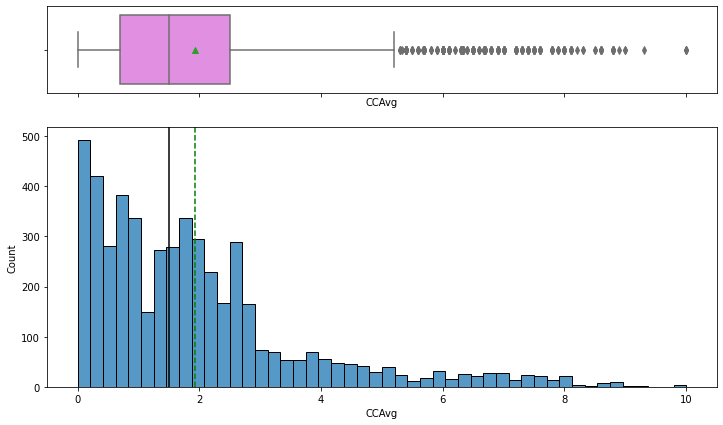

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(data, "CCAvg")

* The distribution of CCAvg is skewed to the right and there are many outliers.
* 50% of the customers have CCAvg less than 1.5.
* We should check if the customers who spend more monthly are inclined toward taking a loan or not.

### Observations on Mortgage

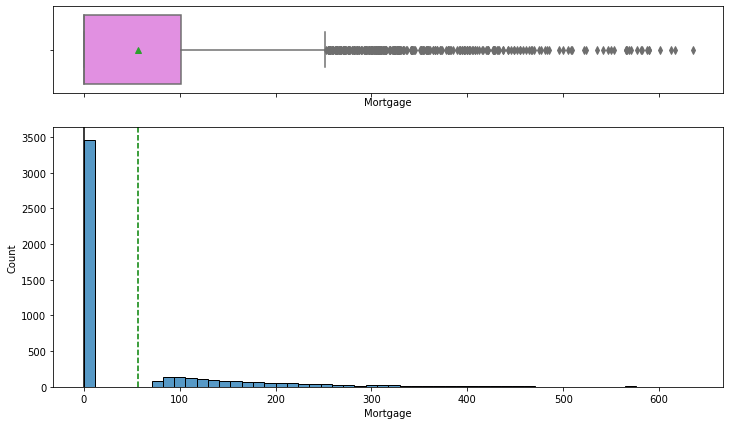

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(data, "Mortgage")

* Most customers have not mortgaged their house but there are many outliers.
* Some customers have a mortgage house value of more than 600k dollars.
* Such customers can be potential customers who require a personal loan.

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on Family

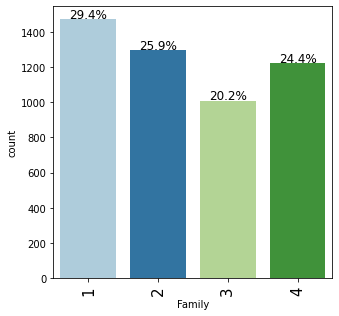

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(data, "Family", perc=True)

* Most of the customers are single/live alone (~30%).
* Second most are the ones with one dependent on them (25.9%).

### Observations on Education

In [24]:
# Let's map the values to 1: Undergrad; 2: Graduate 3: Advanced/Professional

<IPython.core.display.Javascript object>

In [25]:
data["Education"].replace(1, "Undergraduate", inplace=True)
data["Education"].replace(2, "Graduate", inplace=True)
data["Education"].replace(3, "Professional", inplace=True)

<IPython.core.display.Javascript object>

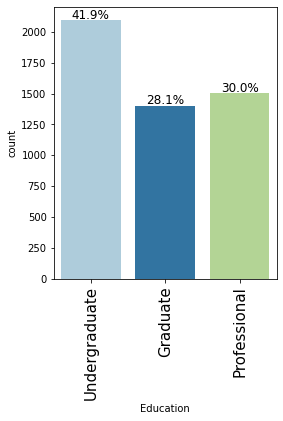

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(data, "Education", perc=True)

* Most of the customers are undergraduate (41.9%), followed by customers who have advanced/professional education (30%).

### Observations on Securities_Account

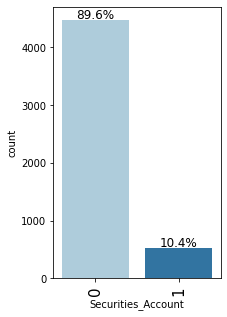

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(data, "Securities_Account", perc=True)

* 89% of the customers do not have a securities account.

### Observations on CD_Account

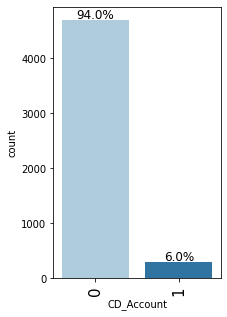

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(data, "CD_Account", perc=True)

* 94% of the customers do not have a certificate of deposit (CD_Account) with the bank.

### Observations on Online

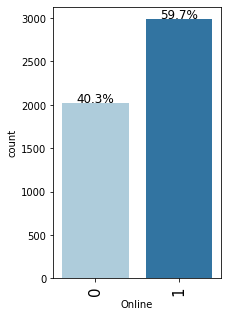

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(data, "Online", perc=True)

* Approximately 60% of the customers use internet banking facilities.

### Observation on CreditCard

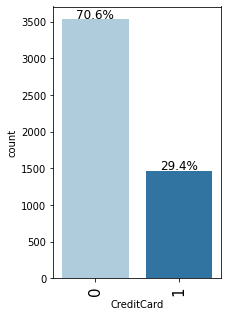

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(data, "CreditCard", perc=True)

* Approximately 70% of customers do not have a credit card issued by any other bank.

### Observation on ZIPCode

In [31]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

<IPython.core.display.Javascript object>

* There are 467 unique values in the zip code.
* In the US, The first digit of a PIN indicates the zone or a region, the second indicates the sub-zone, and the third, combined with the first two, indicates the sorting district within that zone. The final three digits are assigned to individual post offices within the sorting district
* Let's try to group them based on the first 2 digits to reduce the number of unique values in the ZIPCode column.

In [32]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

Number of unique values if we take first two digits of ZIPCode:  7


<IPython.core.display.Javascript object>

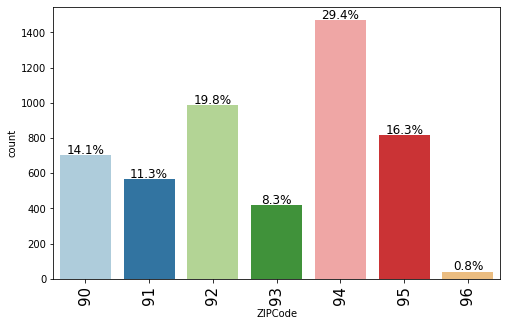

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(data, "ZIPCode", perc=True)

* All the customers are from region 9 and most from sub-region 4 followed by sub-region 2.
* This indicates that is located in region 9 and has customers from nearby areas.

## Bivariate Analysis

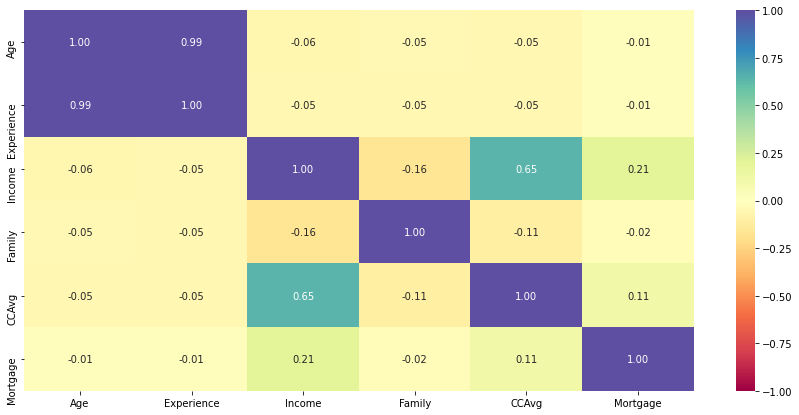

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Age and Experience have a perfect correlation hence one of these variables can be dropped while model building as they will provide the same information to the model.

* Income and CCAvg have a moderate correlation which makes sense as the Income increases the spendings might also increase.

* Family has a negative correlation with Income, which is quite surprising as family size increases the income of the family decreases. But this correlation is not too strong to conclude.

In [35]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>


### Personal_Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


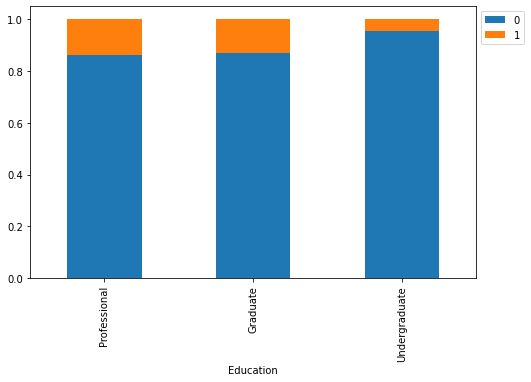

<IPython.core.display.Javascript object>

In [36]:
stacked_barplot(data, "Education", "Personal_Loan")

* ~15% of the customers who have done advanced/professional studies are the ones that require a personal loan.
* Undergraduates have the least requirement of personal loans.

### Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


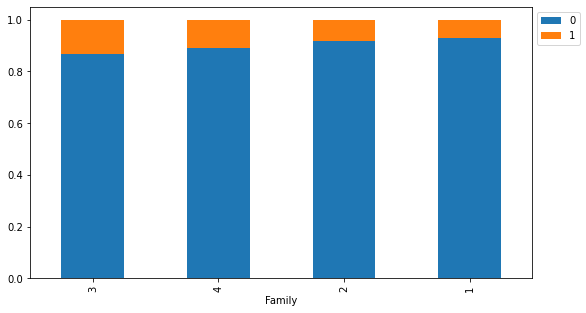

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(data, "Family", "Personal_Loan")

* As the family size increases the requirement of a Personal Loan also increases.
* Customers who have a family size of more than 2 are more likely to take a Personal Loan.

### Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


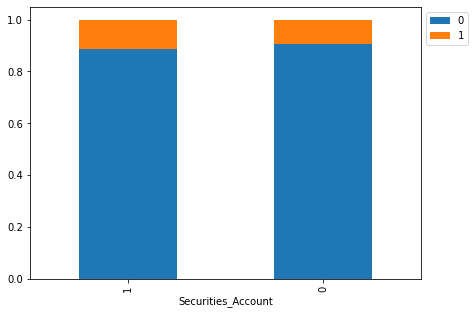

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

* There's not much difference between the customers who do or do not have a Security Account and require a Personal Loan.

### Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


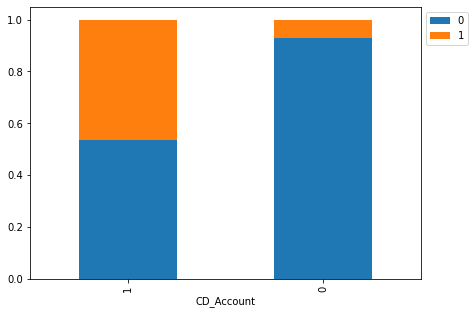

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

* ~50% of the customers who have a certificate of deposit with the bank (CD_Account) are the ones that have the requirement of a Personal Loan.
* This can be one of the significant predictors of Personal Loan as it provides good separation between two classes.

### Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


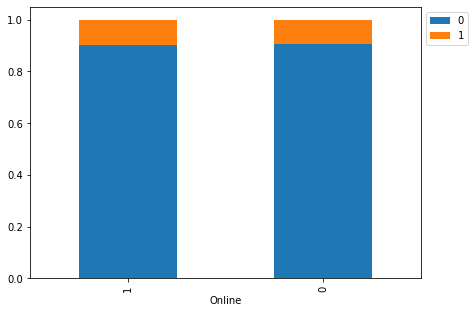

<IPython.core.display.Javascript object>

In [40]:
stacked_barplot(data, "Online", "Personal_Loan")

* There's not much difference between the customers who do or do use internet banking facilities and require a Personal Loan.

### Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


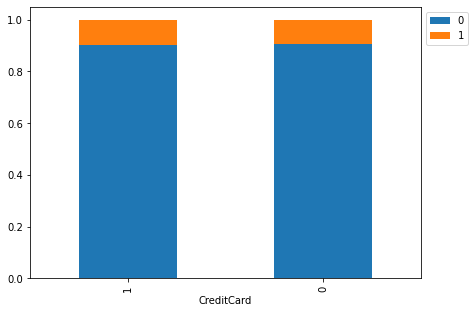

<IPython.core.display.Javascript object>

In [41]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

* There's not much difference between the customers who do or do use a credit card from other banks and require a Personal Loan.

### Personal_Loan vs ZIPCode

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


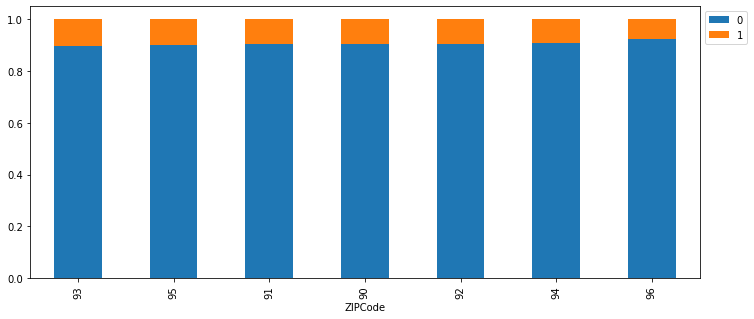

<IPython.core.display.Javascript object>

In [42]:
stacked_barplot(data, "ZIPCode", "Personal_Loan")

* All the sub-regions show fairly the same distribution/ requirement of a Personal Loan.

In [43]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### Personal Loan vs Age

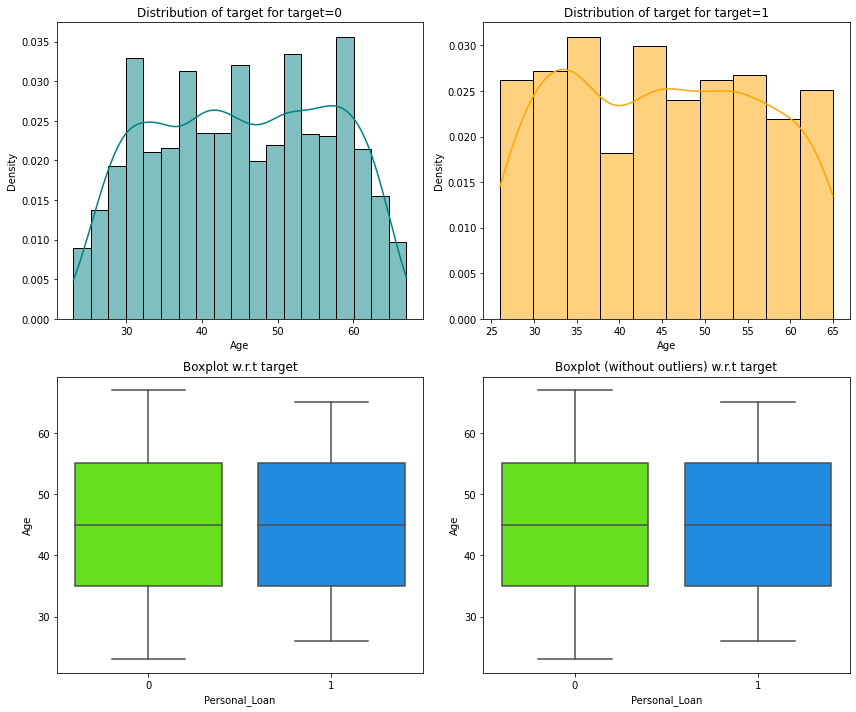

<IPython.core.display.Javascript object>

In [44]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

* The customers who have the requirement of a Personal Loan have a wider range than the ones who do not require a Personal Loan.

### Personal Loan vs Experience

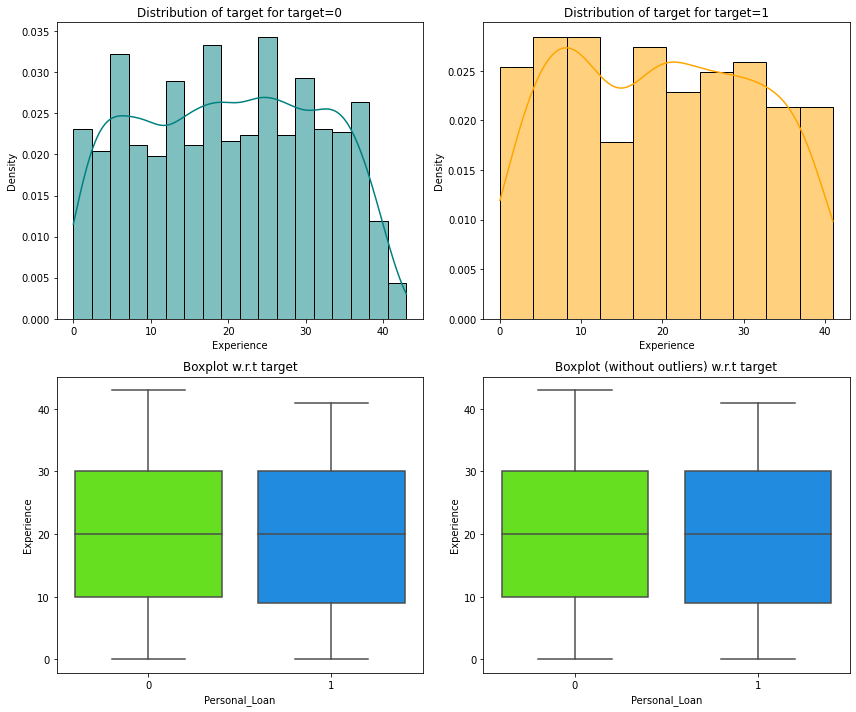

<IPython.core.display.Javascript object>

In [45]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

* There's no difference in the years of experience of customers who took Personal Loan and those who did not.

### Personal Loan vs Income

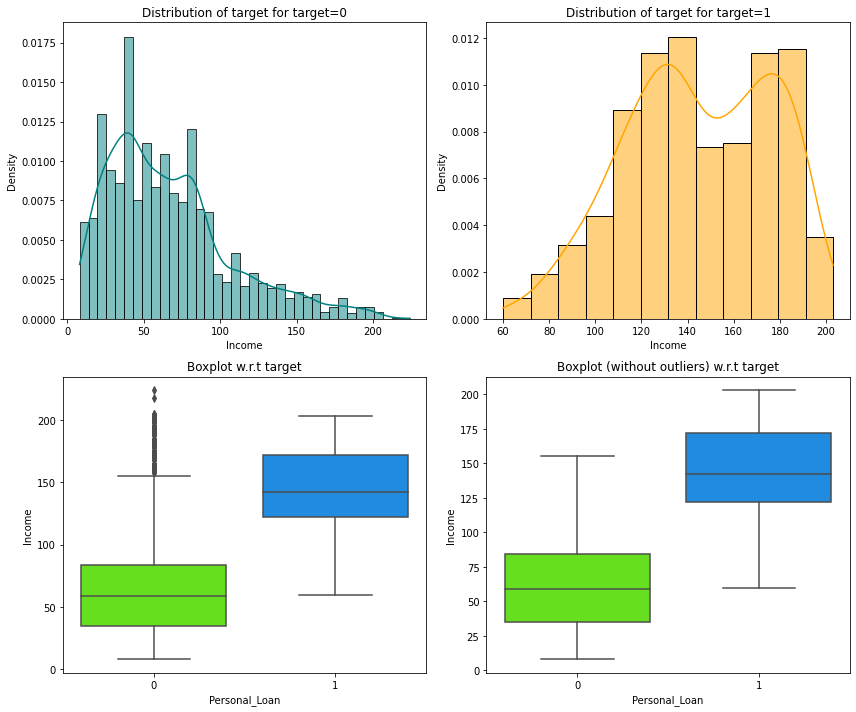

<IPython.core.display.Javascript object>

In [46]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

* Those customers who have an income higher than 90k-100k dollars are the potential customers who will take the Personal Loan.
* Income seems to be a significant predictor as it provides a good separation between two classes.

### Personal Loan vs CCAvg

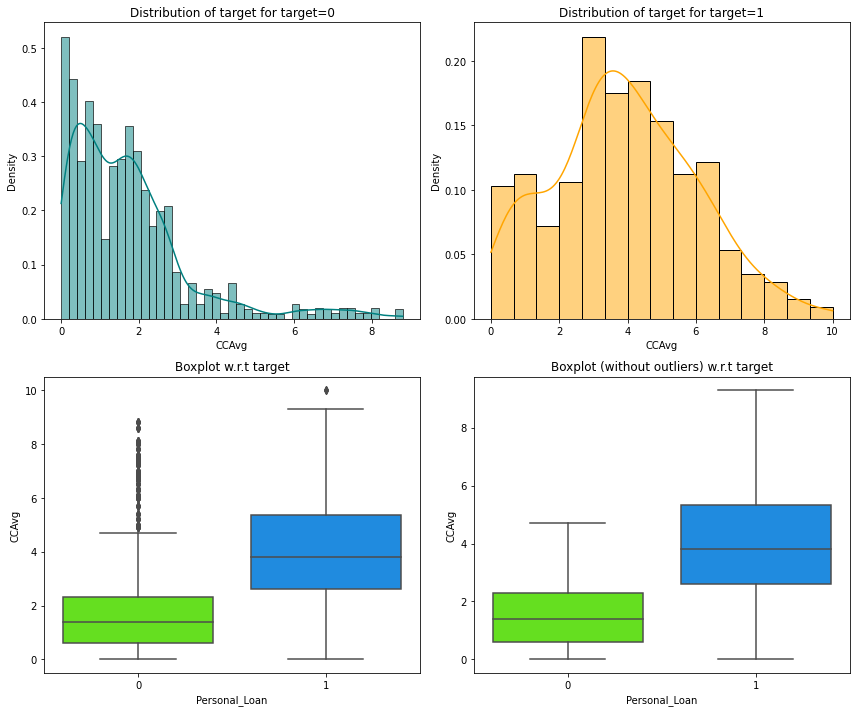

<IPython.core.display.Javascript object>

In [47]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

* The customers with a CCAvg of greater than 5 can be the potential customers who opt for Personal Loan.

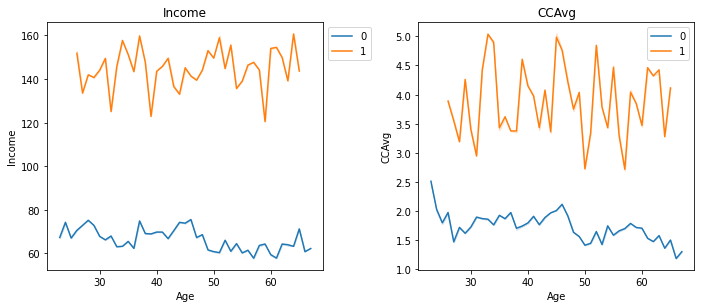

<IPython.core.display.Javascript object>

In [48]:
cols = data[["Income", "CCAvg"]].columns.tolist()
plt.figure(figsize=(15, 12))
for i, variable in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.lineplot(data["Age"], data[variable], hue=data["Personal_Loan"], ci=0)
    plt.tight_layout()
    plt.title(variable)
    plt.legend(bbox_to_anchor=(1, 1))
plt.show()

* Customers who require Personal Loans are the ones whose income fluctuates largely with the increase in Age and - This clearly shows how financial stability plays a big part in the requirement of a loan.
Customers whose income fluctuates largely with the age i.e. have less income stability are more likely to take a personal loan.

* We can observe a similar pattern like income w.r.t CCAvg.

### Let's find the percentage of outliers, in each column of the data, using IQR.

In [49]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

<IPython.core.display.Javascript object>

In [50]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

<IPython.core.display.Javascript object>

* After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in a real case scenario (in Income, Mortgage value, Average spending on the credit card, etc) and we would want our model to learn the underlying pattern for such customers.

### <a id='link1'>Summary of EDA</a>
**Data Description:**
* The dataset has 5000 rows and 14 columns 
* There are no missing values in the dataset.
* Dependent variable is Personal_Loan.

**Data Cleaning:**

* `Experience:` We observed that there are negative values in the Experience column. We assume that these negative signs here are data input errors, so we will replace them with positive values.
* `ZIPCode`: 
    * There are 467 unique values in the zip code.
    * In the US, The first digit of a PIN indicates the zone or a region, the second indicates the sub-zone, and the third, combined with the first two, indicates the sorting district within that zone. The final three digits are assigned to individual post offices within the sorting district
    * We grouped them based on the first 2 digits to reduce the number of unique values in the ZIPCode column. 
* `ID`: The ID attribute does not add any information to our analysis as all the values are unique. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We will drop this feature.


**Observations from EDA:**

* `Age`: Average age of customers is 45 years, age of customers has a wide range from 23 to 67 years. The distribution of Age is fairly symmetrical about the mean and the median. 


* `Experience`: 
    * The Experience variable seems to be fairly symmetrical about mean and median. The distribution of Experience looks like the distribution of Age. The mean and median experience of customers is equal to ~20 years.
    * Some customers have experience of more than 40 years.


* `Income`: 
    * Average income of customers is 73k dollars. Income has a wide range from 8k dollars to 224k dollars.
    * The distribution of Income is skewed to right.
    * 50% of the customers have income less than 64k dollars.


* `CCAvg`: 
    * Some customers have average spending of 0 dollars a month.
    * The distribution of CCAvg is skewed to the right and there are many outliers.
    * 50% of the customers have CCAvg less than 1.5.


* `Mortgage`: 
    * Average mortgage value of house of customers is ~56k dollars
    * Most customers have not mortgaged their house but there are many outliers.
    * Some customers have a mortgage house value of more than 600k dollars. Such customers can be potential customers who require a personal loan.


* `Family`: 
    * Most of the customers are single/live alone (~30%).
    * Second most are the ones with one dependent on them (25.9%).

* `ZIPCode`: 
    * All the customers are from region 9 and most from sub-region 4 followed by sub-region 2.
    * This indicates that bank is located in region 9 and has customers from nearby areas.


* `Education`: Most of the customers are undergraduate (41.9%), followed by customers who have advanced/professional education (30%).

* `Securities_Account`:* 89% of the customers do not have a securities account.
* `CD_Account`: 94% of the customers do not have a certificate of deposit (CD_Account) with the bank.


* `Observations on correlation:`
    * Age and Experience have an almost perfect correlation hence one of these variables can be dropped while model building as they will provide the same information to the model.
    * Income and CCAvg have a moderate correlation which makes sense as the Income increases the spendings might also increase.


* `Personal_Loan vs Education:`
    * ~15% of the customers who have done advanced/professional studies are the ones that require a personal loan.
    * Undergraduates have the least requirement of personal loans.


* `Personal_Loan vs Family:`
    * As the family size increases the requirement of a Personal Loan also increases.
    * Customers who have a family size of more than 2 are more likely to take a Personal Loan.


* `Personal_Loan vs CD_Account:`
    * ~50% of the customers who have a certificate of deposit with the bank (CD_Account) are the ones that have the requirement of a Personal Loan.
    * This can be one of the significant predictors of Personal Loan as it provides good separation between two classes.


* `Personal_Loan vs Income:`
    * Those customers who have an income higher than 90k-100k dollars are the potential customers who will take the Personal Loan.
    * Income seems to be a significant predictor as it provides a good separation between two classes.


* `Personal_Loan vs CCAvg:` The customers with a CCAvg of greater than 5 can be the potential customers who opt for Personal Loan.

### Actions for data pre-processing:

* We will not be treating the outliers as in a real case scenario (in Income, Mortgage value, Average spending on the credit card, etc) and we would want our model to learn the underlying pattern for such customers
* We have 6 categorical independent variables but 4 of them are binary, so we'll have the same results with them even after creating dummies
* So we will only make dummies for ZIPCode and Education.

### Data Preparation

In [51]:
data["ZIPCode"] = data["ZIPCode"].astype("category")

<IPython.core.display.Javascript object>

In [52]:
# dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)

Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [53]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

### Building the model

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will take the personal loan but in reality the customer will not take the personal loan - Loss of resources
2. Predicting a customer will not take the personal loan but in reality the customer was going to take the personal loan - Loss of opportunity

### Which case is more important? 
* Losing a potential customer by predicting that the customer will not be taking the personal loan but in reality the customer was going to take the personal loan.

### How to reduce this loss i.e need to reduce False Negatives?

* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models. 
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [54]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [55]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression

In [56]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

### Finding the coefficients

In [57]:
log_odds = lg.coef_[0]
pd.options.display.float_format = "{:.5f}".format
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

,Age,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96,Education_Graduate,Education_Professional
coef,0.00487,0.05467,0.63135,0.18623,0.00089,-0.78992,3.11939,-0.53051,-0.84321,-0.11836,0.23322,0.21395,0.02094,-0.01114,-0.31270,3.32758,3.42572


<IPython.core.display.Javascript object>

### Coefficient interpretation

* Coefficients of Age, Income, Family, CCAvg, CD_Account, and Education, and some levels of ZIPCode are positive an increase in these will lead to an increase in chances of taking a personal loan.

* Coefficients of Securities_Account, CreditCard, Online, and some levels of ZIPCode are negative an increase in these will lead to a decrease in chances of taking a personal loan.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [58]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,Age,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96,Education_Graduate,Education_Professional
Odds,1.00489,1.05619,1.88015,1.20470,1.00089,0.45388,22.63260,0.58831,0.43033,0.88838,1.26266,1.23856,1.02116,0.98892,0.73147,27.87084,30.74469
Change_odd%,0.48860,5.61936,88.01465,20.47009,0.08916,-54.61210,2163.26033,-41.16929,-56.96742,-11.16236,26.26644,23.85646,2.11579,-1.10781,-26.85299,2687.08395,2974.46858


<IPython.core.display.Javascript object>

### Coefficient interpretations

* `Age`: Holding all other features constant a 1 unit increase in Age will increase the odds of a customer taking the personal loan by 1.004 times or a 0.48% increase in the odds.
* `Income`: Holding all other features constant a 1 unit increase in Income will increase the odds of taking a personal loan by 1.05 times or a 5.61% increase in the odds.
* `Family`: Holding all other features constant a 1 unit increase in Family will increase the odds of taking a personal loan by 1.88 times or a 88.01% increase in the odds.
* `CCAvg`: Holding all other features constant a 1 unit increase in CCAvg will increase the odds of a customer taking a personal loan by 1.20 times or a 20.47% increase in the odds.
* `Securities_Account`: The odds of a customer who has a Securities_Account with bank taking a personal loan is 0.45 times or 54.6% less than the customer who doesn't have a Securities_Account.
* `Online`: The odds of a customer who prefers internet banking facilities taking a personal loan is 0.58 times or 41.16% less than the customer who doesn't use internet banking facilities.
* The odds of a customer from ZIPCode_91 are 0.88 times or 11.16% less than the customer from ZIPCode_90. Similarly, the odds of a customer from ZIPCode_92 are 1.26 times or  26.26% more than the customer from ZIPCode_90. Interpretation of other ZIPCodes can be done in the same way by keeping ZIPCode_90 as the reference.
* Education and CD_Account have greater coefficients, so small increases in their value will have a bigger increase in chances of taking a personal loan.

`Interpretation for other attributes can be made similarly.`

#### Checking model performance on the training set

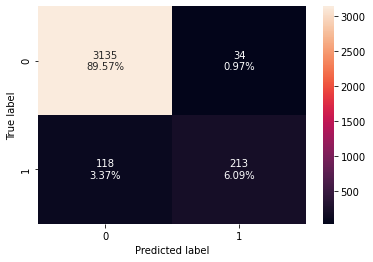

<IPython.core.display.Javascript object>

In [59]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [60]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.95657,0.64350,0.86235,0.73702


<IPython.core.display.Javascript object>

#### ROC-AUC
* ROC-AUC on training set

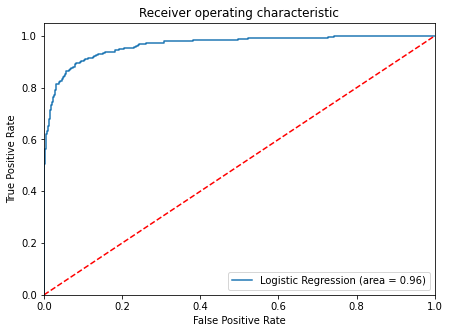

<IPython.core.display.Javascript object>

In [61]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.
* ROC-AUC score of 0.96 on training is quite good.

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [62]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.1189881291384323


<IPython.core.display.Javascript object>

#### Checking model performance on the training set

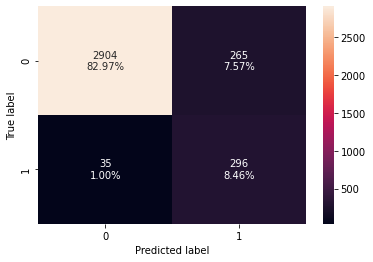

<IPython.core.display.Javascript object>

In [63]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [64]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.91429,0.89426,0.52763,0.66368


<IPython.core.display.Javascript object>

* Recall has increased significantly as compared to the previous model.
* As we will decrease the threshold value, Recall will keep on increasing and the Precision will decrease, but this not right because it will lead to loss of resources, we need to choose an optimal balance between recall and precision.

#### Let's use Precision-Recall curve and see if we can find a better threshold

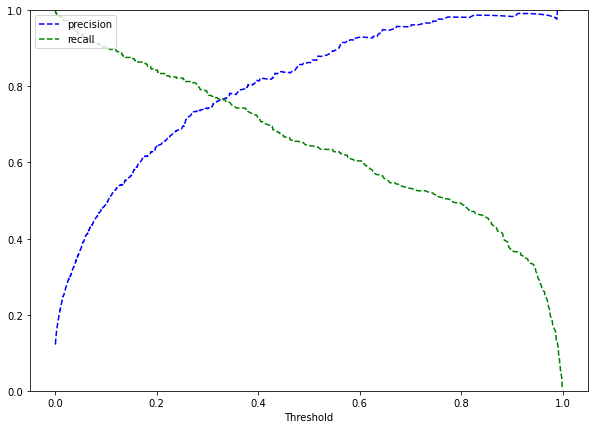

<IPython.core.display.Javascript object>

In [65]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At threshold around 0.27 we get a higher recall and a good precision.

In [66]:
# setting the threshold
optimal_threshold_curve = 0.27

<IPython.core.display.Javascript object>

#### Checking model performance on training set

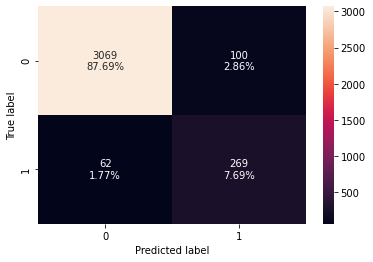

<IPython.core.display.Javascript object>

In [67]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [68]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.95371,0.81269,0.72900,0.76857


<IPython.core.display.Javascript object>

* Model is performing well on training set.
* Model has given a balanced performance, if the bank wishes to maintain a balance between recall and precision this model can be used.

### Sequential Feature Selector

In [69]:
# Sequential feature selector is present in mlxtend library
# !pip install mlxtend to install mlxtent library

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

<IPython.core.display.Javascript object>

In [70]:
## Defining X and Y variables
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data[["Personal_Loan"]]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Splitting data in train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [71]:
# Fit the model on train
model = LogisticRegression(solver="newton-cg", n_jobs=-1, random_state=1)

<IPython.core.display.Javascript object>

In [72]:
# we will first build model with all varaible
sfs = SFS(
    model,
    k_features=17,
    forward=True,
    floating=False,
    scoring="recall",
    verbose=2,
    cv=5,
    n_jobs=-1,
)

sfs = sfs.fit(X_train2, y_train2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    4.1s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    4.2s finished

[2021-09-22 13:55:35] Features: 1/17 -- score: 0.32623247399366806[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    0.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.9s finished

[2021-09-22 13:55:36] Features: 2/17 -- score: 0.4379466304839439[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.8s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.1s finished

[2021-09-22 13:55:37] Features: 3/17 -- score: 0.48946178199909546[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  

<IPython.core.display.Javascript object>

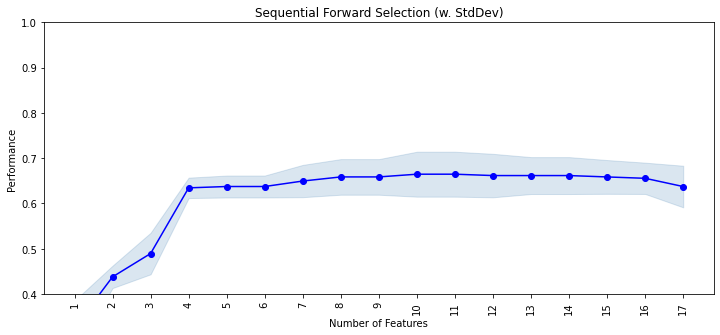

<IPython.core.display.Javascript object>

In [73]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_dev", figsize=(12, 5))
plt.ylim([0.4, 1])
plt.title("Sequential Forward Selection (w. StdDev)")
plt.xticks(rotation=90)
plt.show()

* We can see that performance increases till the 6th feature and then became constant, and the performance increased again after the addition 11th feature. One of the reasons for such an increase can be the interaction of variables.
* The decision to choose the k_features now depends on the recall score vs the complexity of the model - with 6 features we are getting a 0.63 recall score and with 11 features we will get a 0.66 recall score.
* The increase in recall score is not much significant as we are getting the same values with a less complex model.
* So we'll use 6 features only to build our mode but it depends on the business context and use case of the model.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.4s finished

[2021-09-22 13:55:50] Features: 1/6 -- score: 0.32623247399366806[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.1s finished

[2021-09-22 13:55:51] Features: 2/6 -- score: 0.4379466304839439[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.1s finished

[2021-09-22 13:55:53] Features: 3/6 -- score: 0.48946178199909546[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 

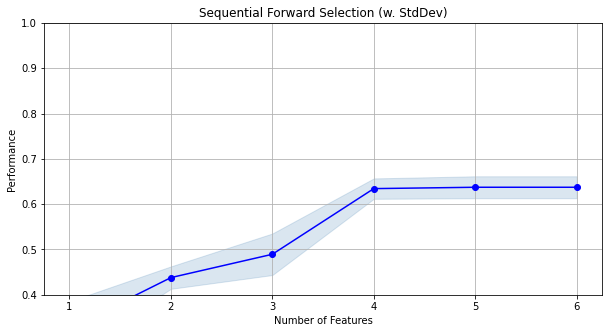

<IPython.core.display.Javascript object>

In [74]:
sfs1 = SFS(
    model,
    k_features=6,
    forward=True,
    floating=False,
    scoring="recall",
    verbose=2,
    cv=5,
    n_jobs=-1,
)

sfs1 = sfs1.fit(X_train, y_train)

fig1 = plot_sfs(sfs1.get_metric_dict(), kind="std_dev", figsize=(10, 5))

plt.ylim([0.4, 1])
plt.title("Sequential Forward Selection (w. StdDev)")
plt.grid()
plt.show()

**Finding which features are important**

In [75]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 7, 8, 15, 16]


<IPython.core.display.Javascript object>

**Let's look at best 6 variables**

In [76]:
X_train2.columns[feat_cols]

Index(['Income', 'Family', 'Online', 'CreditCard', 'Education_Graduate',
       'Education_Professional'],
      dtype='object')

<IPython.core.display.Javascript object>

In [77]:
X_train_final = X_train2[X_train2.columns[feat_cols]]

# Creating new x_test with the same variables that we selected for x_train
X_test_final = X_test2[X_train_final.columns]

<IPython.core.display.Javascript object>

In [78]:
# Fitting logistic regession model

logreg = LogisticRegression(solver="newton-cg", random_state=1)

logreg.fit(X_train_final, y_train2)

LogisticRegression(random_state=1, solver='newton-cg')

<IPython.core.display.Javascript object>

#### Checking the performance on training set

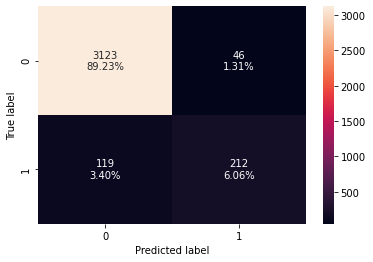

<IPython.core.display.Javascript object>

In [79]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(logreg, X_train_final, y_train2)

In [80]:
log_reg_model_train_perf_SFS = model_performance_classification_sklearn_with_threshold(
    logreg, X_train_final, y_train2
)

print("Training performance:")
log_reg_model_train_perf_SFS

Training performance:


,Accuracy,Recall,Precision,F1
0,0.95286,0.64048,0.82171,0.71986


<IPython.core.display.Javascript object>

### Let's check the performance on the test set

**Using model with default threshold**

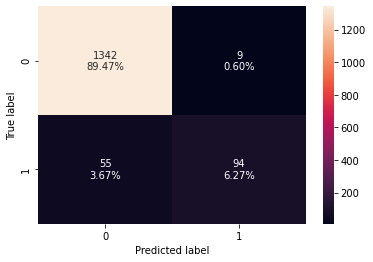

<IPython.core.display.Javascript object>

In [81]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [82]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.95733,0.63087,0.91262,0.74603


<IPython.core.display.Javascript object>

* ROC curve on test set

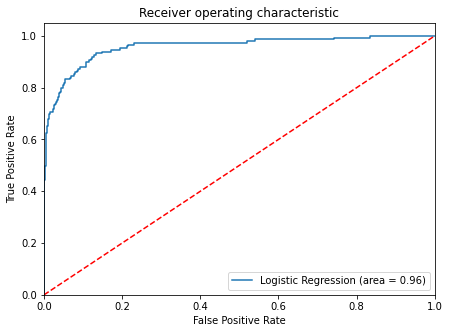

<IPython.core.display.Javascript object>

In [83]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.11** 

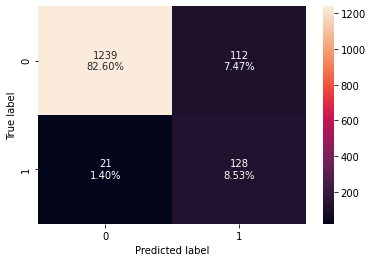

<IPython.core.display.Javascript object>

In [84]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [85]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.91133,0.85906,0.53333,0.65810


<IPython.core.display.Javascript object>

**Using model with threshold = 0.27**

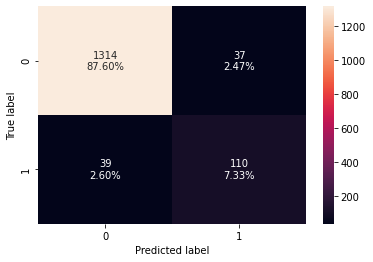

<IPython.core.display.Javascript object>

In [86]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [87]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.94933,0.73826,0.74830,0.74324


<IPython.core.display.Javascript object>

**Using SFS**

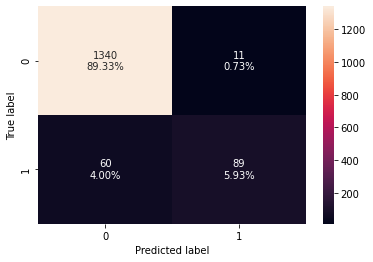

<IPython.core.display.Javascript object>

In [88]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(logreg, X_test_final, y_test2)

In [89]:
log_reg_model_test_perf_SFS = model_performance_classification_sklearn_with_threshold(
    logreg, X_test_final, y_test2
)

print("Test performance:")
log_reg_model_test_perf_SFS

Test performance:


,Accuracy,Recall,Precision,F1
0,0.95267,0.59732,0.89000,0.71486


<IPython.core.display.Javascript object>

### Model performance summary

In [90]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
        log_reg_model_train_perf_SFS.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.11 Threshold",
    "Logistic Regression-0.27 Threshold",
    "Logistic Regression - SFS",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.11 Threshold,Logistic Regression-0.27 Threshold,Logistic Regression - SFS
Accuracy,0.95657,0.91429,0.95371,0.95286
Recall,0.64350,0.89426,0.81269,0.64048
Precision,0.86235,0.52763,0.72900,0.82171
F1,0.73702,0.66368,0.76857,0.71986


<IPython.core.display.Javascript object>

In [91]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
        log_reg_model_test_perf_SFS.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.11 Threshold",
    "Logistic Regression-0.27 Threshold",
    "Logistic Regression - SFS",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.11 Threshold,Logistic Regression-0.27 Threshold,Logistic Regression - SFS
Accuracy,0.95733,0.91133,0.94933,0.95267
Recall,0.63087,0.85906,0.73826,0.59732
Precision,0.91262,0.53333,0.74830,0.89000
F1,0.74603,0.65810,0.74324,0.71486


<IPython.core.display.Javascript object>

### Conclusion
- We have been able to build a predictive model that can be used by the bank to find the potential customers who will be willing to take a personal loan with recall of 0.89 on the training set and formulate marketing policies accordingly.

* The logistic regression models are giving a generalized performance on training and test set.

*  Using the model with default threshold the model will give a low recall but good precision score - This model will help the bank save resources but lose on potential customers.
* Using the model with 0.11 threshold the model will give a high recall but low precision score - This model will help the bank identify potential customers effectively but the cost of resources will be high.
* Using the model with 0.27 threshold the model will give a balance recall and precision score - This model will help the bank to maintain a balance in identifying potential customer and the cost of resources.
* The model obtained after SFS gives a similar performance as initial model but with less number of variables.

* Coefficients of Age, Income, Family, CCAvg, CD_Account, and Education, and some levels of ZIPCode are positive an increase in these will lead to an increase in chances of taking a personal loan.

* Coefficients of Securities_Account, CreditCard, Online, and some levels of ZIPCode are negative an increase in these will lead to a decrease in chances of taking a personal loan.

### Decision Tree

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearnfunction will be used to plot confusion matrix.

In [92]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [93]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Build Decision Tree Model

In [94]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

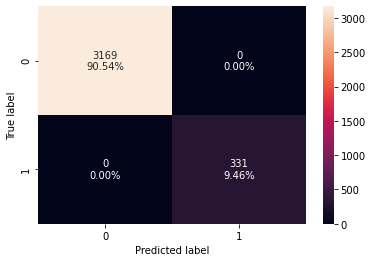

<IPython.core.display.Javascript object>

In [95]:
confusion_matrix_sklearn(model, X_train, y_train)

In [96]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


<IPython.core.display.Javascript object>

* 0 errors on the training set, each sample has been classified correctly.
* Model has performed very well on training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.

### Visualizing the Decision Tree

In [97]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Graduate', 'Education_Professional']


<IPython.core.display.Javascript object>

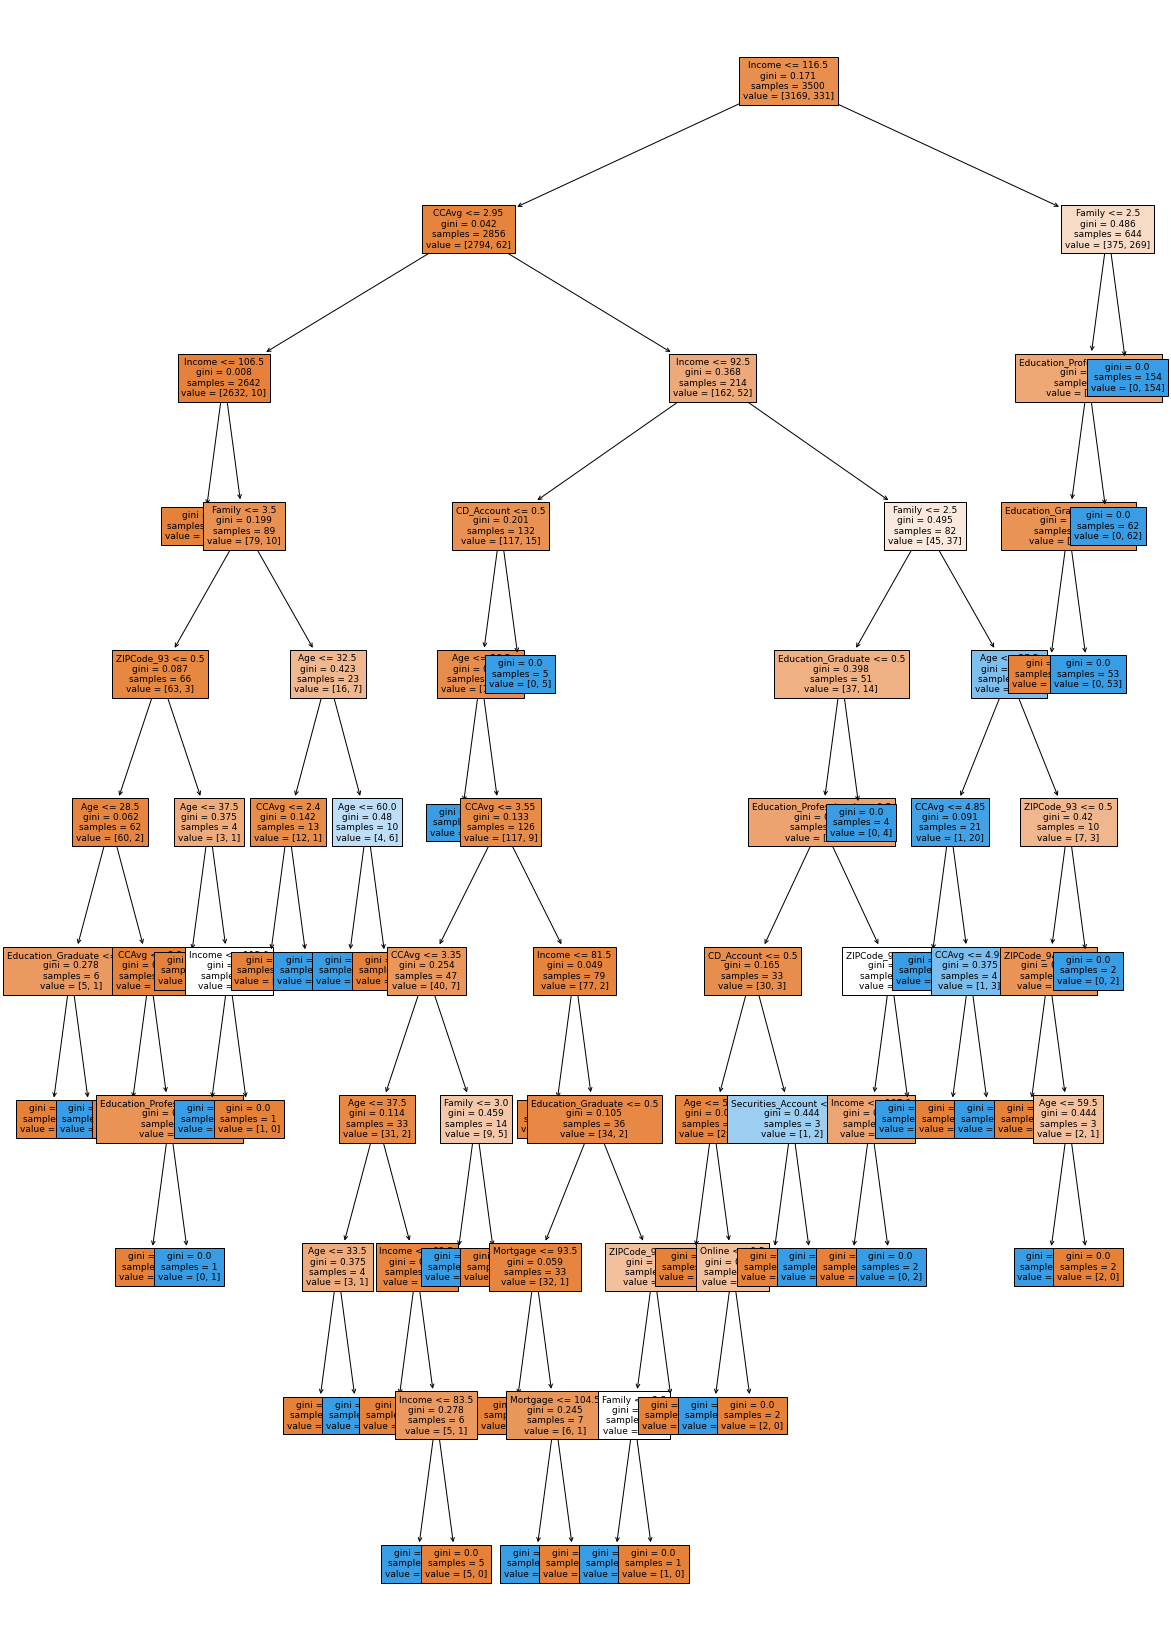

<IPython.core.display.Javascript object>

In [98]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [99]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Graduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_Graduate >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|

<IPython.core.display.Javascript object>

In [100]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                           Imp
Income                 0.30810
Family                 0.25926
Education_Graduate     0.16619
Education_Professional 0.14713
CCAvg                  0.04880
Age                    0.03315
CD_Account             0.01727
ZIPCode_94             0.00718
ZIPCode_93             0.00468
Mortgage               0.00324
Online                 0.00222
Securities_Account     0.00222
ZIPCode_91             0.00056
ZIPCode_92             0.00000
ZIPCode_95             0.00000
ZIPCode_96             0.00000
CreditCard             0.00000


<IPython.core.display.Javascript object>

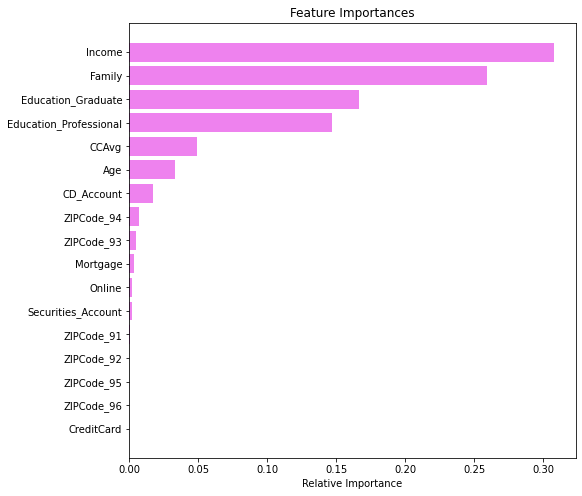

<IPython.core.display.Javascript object>

In [101]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income is the most important feature followed by family and education.
* The tree above is very complex and difficult to interpret. 
* Let's prune the tree to see if we can reduce the complexity.

### Model Improvement

* **Pre-Pruning**

In [102]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=10,
                       random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

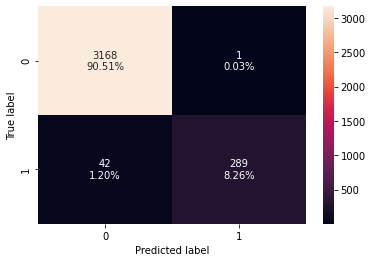

<IPython.core.display.Javascript object>

In [103]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [104]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.98771,0.87311,0.99655,0.93076


<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

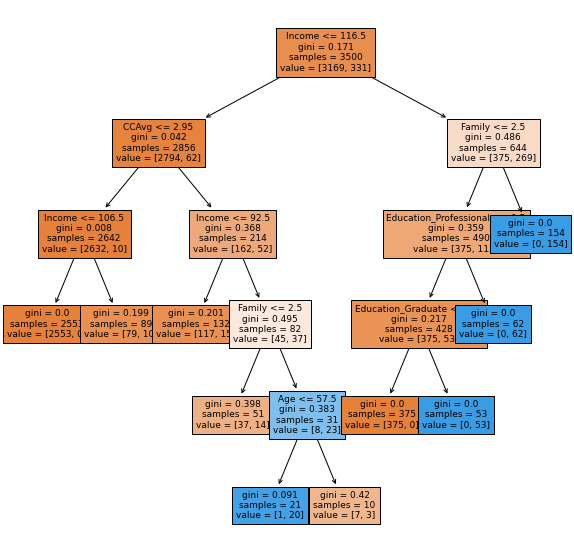

<IPython.core.display.Javascript object>

In [105]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [106]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- weights: [37.00, 14.00] class: 0
|   |   |   |--- Family >  2.50
|   |   |   |   |--- Age <= 57.50
|   |   |   |   |   |--- weights: [1.00, 20.00] class: 1
|   |   |   |   |--- Age >  57.50
|   |   |   |   |   |--- weights: [7.00, 3.00] class: 0
|--- Income >  116.50
|   |--- Family <= 2.50
|   |   |--- Education_Professional <= 0.50
|   |   |   |--- Education_Graduate <= 0.50
|   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |--- Education_Graduate >  0.50
|   |   |   |   |--- weights: [0.00, 53.00] class: 1
|   |   |--- Education_Professional >  0.50
|   |   |   |--- weights: [0.00, 6

<IPython.core.display.Javascript object>

**Observations**
* We can see that the tree has become simpler and more readable.
* The model performance has decreased but a recall of 0.87 is still satisfactory.

In [107]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                           Imp
Income                 0.30810
Family                 0.25926
Education_Graduate     0.16619
Education_Professional 0.14713
CCAvg                  0.04880
Age                    0.03315
CD_Account             0.01727
ZIPCode_94             0.00718
ZIPCode_93             0.00468
Mortgage               0.00324
Online                 0.00222
Securities_Account     0.00222
ZIPCode_91             0.00056
ZIPCode_92             0.00000
ZIPCode_95             0.00000
ZIPCode_96             0.00000
CreditCard             0.00000


<IPython.core.display.Javascript object>

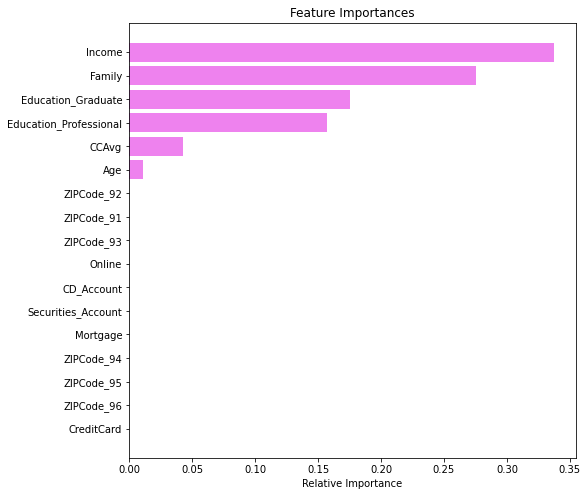

<IPython.core.display.Javascript object>

In [108]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Decision tree after pre-pruning has given similar feature importance and decision rules.

**Observations from decision rules**
* Online, CreditCard, Securities_Account, ZIPCode have very little importance, Income is most important followed by Family and Education
* People with Income less than 116.5k dollars, CCAvg less than 2.95, and Income less than 106.5k dollars have fewer chances of taking a Personal Loan.
* But people having income more than 106.5, Family not of size 4, age less than 28.50 and Experience greater than 3.50 have more chances of taking a loan.
* People with Income greater than 116.5, are undergraduate, have a family size less than 2 have fewer chances of buying a loan while People with a family size greater than 2, and education level more than undergraduate has more chances of buying a loan.
* So bank should campaign more on people with higher income, More education, and larger family sizes

* **Cost Complexity Pruning**

In [109]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [110]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00000
1,0.00019,0.00111
2,0.00021,0.00154
3,0.00024,0.00275
4,0.00025,0.00325
5,0.00027,0.00432
6,0.00027,0.00487
7,0.00028,0.00542
8,0.00038,0.00580
9,0.00053,0.00633


<IPython.core.display.Javascript object>

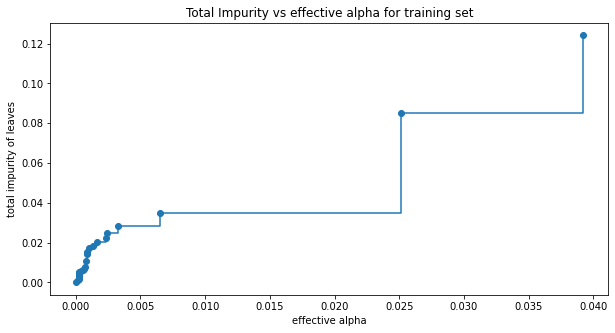

<IPython.core.display.Javascript object>

In [111]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [112]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

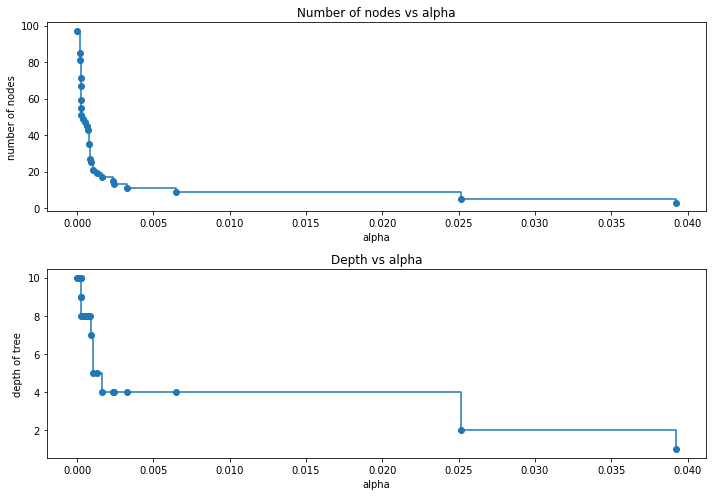

<IPython.core.display.Javascript object>

In [113]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and testing sets

In [114]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

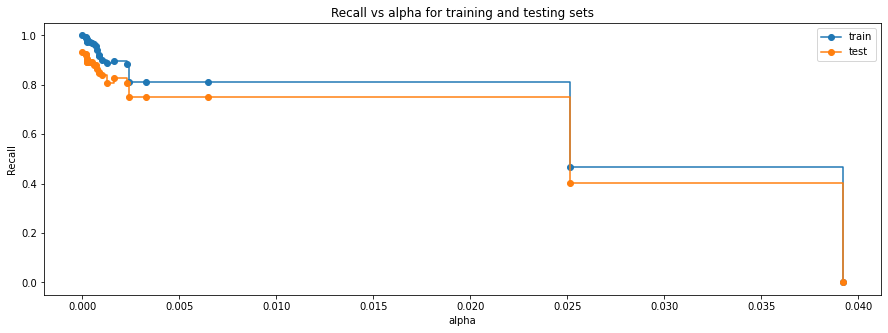

<IPython.core.display.Javascript object>

In [115]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [116]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


<IPython.core.display.Javascript object>

* Post-pruning using ccp alpha returns the same model as the initial model (Tree with no pruning).
* As post pruning model is the same as the initial decision tree mode, the performance and feature importance will also be the same.

### Let's check the performance on test set

**Using the decision tree with default parameters**

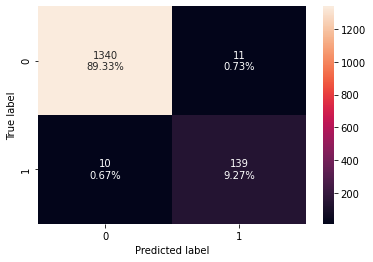

<IPython.core.display.Javascript object>

In [117]:
confusion_matrix_sklearn(model, X_test, y_test)

In [118]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.98600,0.93289,0.92667,0.92977


<IPython.core.display.Javascript object>

**Using the hyperparameter tuned decision tree**

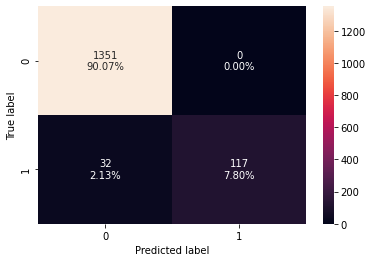

<IPython.core.display.Javascript object>

In [119]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [120]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.97867,0.78523,1.00000,0.87970


<IPython.core.display.Javascript object>

### Comparing Decision Tree models

In [121]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning)
Accuracy,1.00000,0.98771
Recall,1.00000,0.87311
Precision,1.00000,0.99655
F1,1.00000,0.93076


<IPython.core.display.Javascript object>

In [122]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning)
Accuracy,0.98600,0.97867
Recall,0.93289,0.78523
Precision,0.92667,1.00000
F1,0.92977,0.87970


<IPython.core.display.Javascript object>

### Conclusion
* Overall we can see that the Decision tree performs better on the dataset
* Looking at important variables based on p-values in Logistic regression and Feature importance in Decision trees
    * Income, CCAvg, CD_Account, Family, Education are important in Both
    * From the Logistic Regression model we observe that the above-mentioned attributes have a positive relationship with Personal Loan.

### Business Recommendations

* We have been able to build a predictive model:

  a) that the bank can deploy to identify customers who will be interested in taking a personal loan.

  b) that the bank can use to find the key factors that will have an impact on a customer taking a personal loan or not.

* Factors that have an impact on Personal_Loan: Income, Family, Education. 

* Higher income customers should be the target customers for the bank - Customers who have income above 116k dollars and a family of more than 2, such customers have higher chances of taking personal loans.

* Higher education higher are the chances to take a loan - Customers who are more educated (education level greater than undergraduate) have a higher chance of taking a personal loan.

* Size of the family has a positive correlation with the personal loan, as the size of the family increases (generally a family size of 3 or more than 3 members) have more chances of a customer taking a personal loan.

* Our analysis showed that ~50% of the customers who have the certificate of deposit with the bank (CD_Account) are the ones that have the requirement of Personal Loan - Bank should target such customers.

### Misclassification analysis (Additional)
* To check whether there is any certain pattern followed by samples that are incorrectly classified by our model (dTree).

In [123]:
data["ZIPCode"] = data["ZIPCode"].astype("category")

X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data[["Personal_Loan"]]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)
Y1 = model.predict(X_test)
Y1 = Y1.reshape(1500, 1)

Y2 = np.subtract(y_test.astype("int"), Y1)

# 1 says, Perosn would buy loan but model predicted he won't
# -1 says, Perosn won't buy loan but model predicted he would

# Let's concatenate this Y2 with X
data1 = pd.DataFrame(Y2)
data2 = pd.concat([X_test, data1], axis=1)

<IPython.core.display.Javascript object>

In [124]:
incorrect_data = data2[data2["Personal_Loan"] != 0]

<IPython.core.display.Javascript object>

In [125]:
incorrect_data.shape

(21, 18)

<IPython.core.display.Javascript object>

* There are 21 misclassifications and on the test set.
* *incorrect_data* consists of all misclassified elements.
* Let's try to see if there is any specific pattern in these samples

In [126]:
profile = ProfileReport(incorrect_data, title="Misclassified Data Points", minimal=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

### Looking at the above profile, we see that incorrectly classified people are :
* Usually between 26 and 65 age and have experience in between 2 to 40 years, with 15 and 17 uniques values.
* Income varies between 60 to 115(thousand dollars), while usual income varied from 8 to 224(thousand dollars)
* Most of the people misclassified have 0 mortgages, no Securities Account, and no CD_account, have a family size 1 or 2, and customers who do not prefer internet banking facilities.
* Based on the business rule, we derived we were able to see that usually people with income less than 116, less mortgage, family size less than 3 doesn't buy loan - There are special cases always, so some people with less income and smaller family size might also buy loan.